In [1]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import numpy as np

/Users/rein/git/rebound/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
true_state = state.State(planets=[{"m":1e-3, "a":1., "h":0.2}])
obs = observations.FakeObservation(true_state, Npoints=100, error=1e-4, tmax=10.)

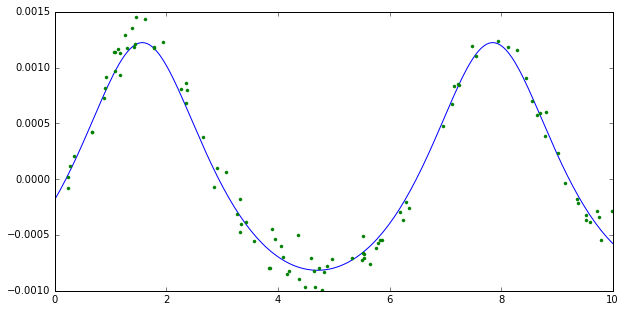

In [3]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
times, rv = true_state.get_rv_plotting(tmax=10.)
ax.plot(times, rv)
ax.plot(obs.t, obs.rv, ".")

In [4]:
true_state.get_chi2(obs)

1.2372791321416872

In [5]:
varState = state.StateVar(planets=[{"m":1e-3, "a":1., "h":0.2, "k":0., "l":1.4}], ignore_vars=["a","m"])

varState.get_chi2(obs)

85.892715928976116

In [6]:
print(varState.planets_vars)

[['h', 'k', 'l']]


In [9]:
Delta = 1e-4
s = state.StateVar(planets=[{"m":1e-3, "a":1., "h":0.2, "k":0., "l":1.4}], ignore_vars=["a","m"])
chi2 = s.get_chi2(obs)
fd_d = np.zeros(s.Nvars)
fd_dd = np.zeros((s.Nvars,s.Nvars))
for i in range(s.Nvars):
    shift = np.zeros(s.Nvars)
    shift[i] = Delta
    s.shift(shift);
    chi2p = s.get_chi2(obs)
    s.shift(-shift);
    fd_d[i] = (chi2p-chi2)/Delta
    for j in range(s.Nvars):
        shift = np.zeros(s.Nvars)
        shift[i] += Delta
        shift[j] += Delta
        s.shift(shift);
        chi2pp = s.get_chi2(obs)
        s.shift(-shift);
        
        shift = np.zeros(s.Nvars)
        shift[i] -= Delta
        shift[j] += Delta
        s.shift(shift);
        chi2mp = s.get_chi2(obs)
        s.shift(-shift);
        
        shift = np.zeros(s.Nvars)
        shift[i] += Delta
        shift[j] -= Delta
        s.shift(shift);
        chi2pm = s.get_chi2(obs)
        s.shift(-shift);
        
        shift = np.zeros(s.Nvars)
        shift[i] -= Delta
        shift[j] -= Delta
        s.shift(shift);
        chi2mm = s.get_chi2(obs)
        s.shift(-shift);
        
        fd_dd[i][j] = (chi2pp-chi2mp-chi2pm+chi2mm)/(4.*Delta**2)

chi2, v_d, v_dd = s.get_chi2_d_dd(obs)

print("First order:")
print(fd_d)
print(v_d)
print("\nSecond order:")
print(fd_dd)
print(v_dd)



First order:
[ 18.50134508   2.01557525  97.79779437]
[ 18.50103215   2.01415545  97.7967812 ]

Second order:
[[  6.25885406 -35.81800421   7.29010026]
 [-35.81800421  28.39453082 -29.85802858]
 [  7.29010026 -29.85802858  20.2675178 ]]
[[  6.25886822 -35.81800025   7.29009095]
 [-35.81800025  28.39453601 -29.85802271]
 [  7.29009095 -29.85802271  20.26753147]]
